In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Reading Dataset

In [2]:
df = pd.read_csv('C:\Vijay\PyCode\Task\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Dataset Analysis

In [3]:
df.shape

(200, 5)

In [4]:
df.rename(columns={'Genre':'Gender'}, inplace=True)

In [5]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Outlier Detection

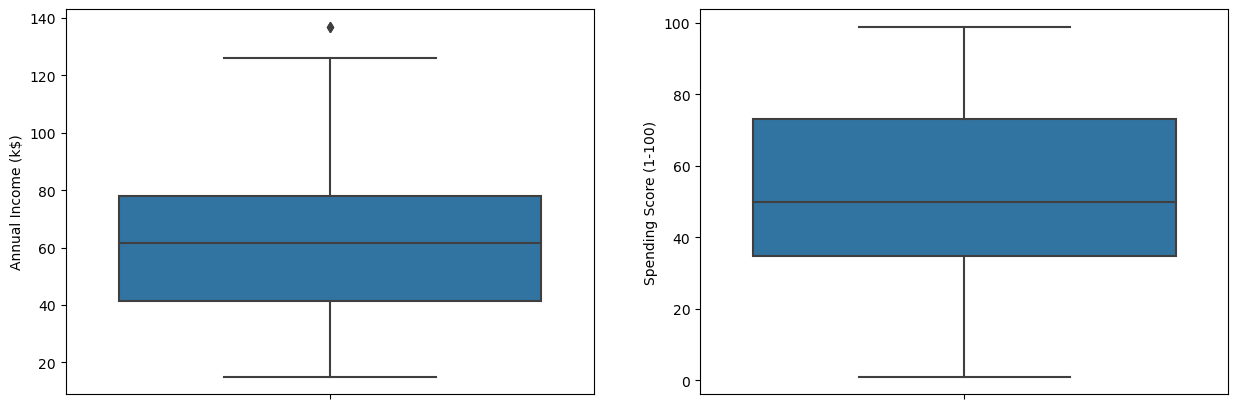

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

Exploring the dataset

c:\Users\vjayr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


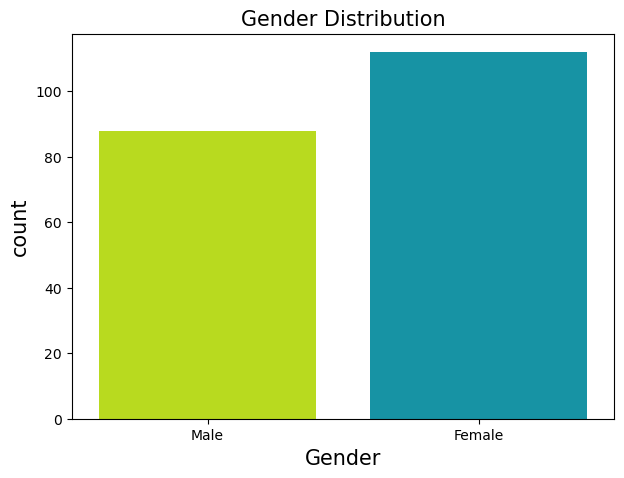

In [12]:
plt.figure(figsize=(7,5))
plt.title("Gender Distribution", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.countplot(df.Gender, palette="nipy_spectral_r")
plt.show()

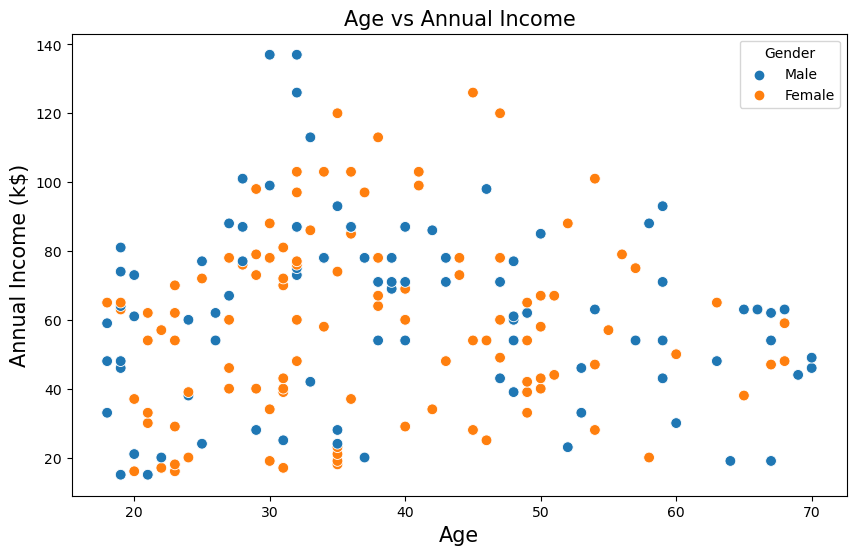

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Age", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Age vs Annual Income", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

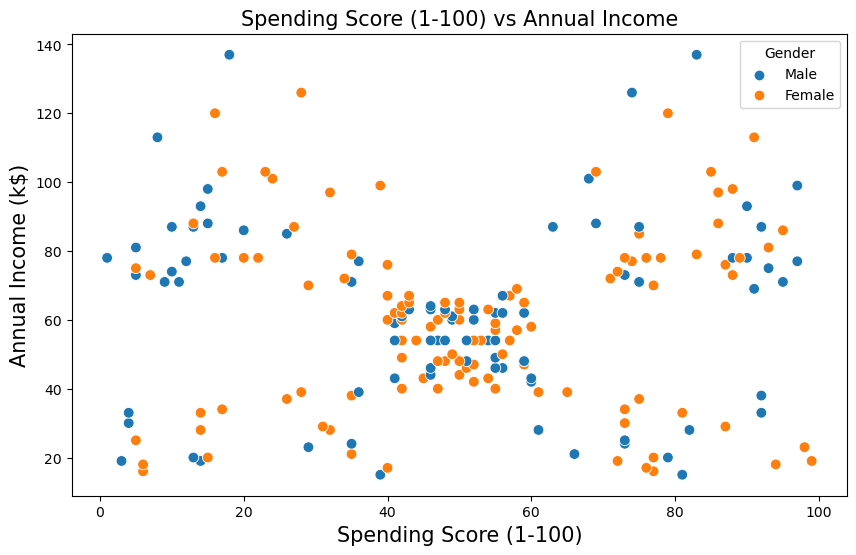

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Spending Score (1-100)", y= "Annual Income (k$)", hue="Gender", s=60)
plt.title("Spending Score (1-100) vs Annual Income", fontsize=15)
plt.xlabel("Spending Score (1-100)", fontsize=15)
plt.ylabel("Annual Income (k$)", fontsize=15)
plt.show()

Scaling the dataset and Model Building

In [15]:
df_scaled = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
df_scaled_fit = scaler.fit_transform(df_scaled)

In [16]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [17]:
var_list = df_scaled_fit[["Annual Income (k$)","Spending Score (1-100)"]]

In [18]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(var_list)

KMeans(max_iter=50, n_clusters=5)

In [19]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [20]:
df["Label"] = kmeans.labels_


In [21]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Clustering

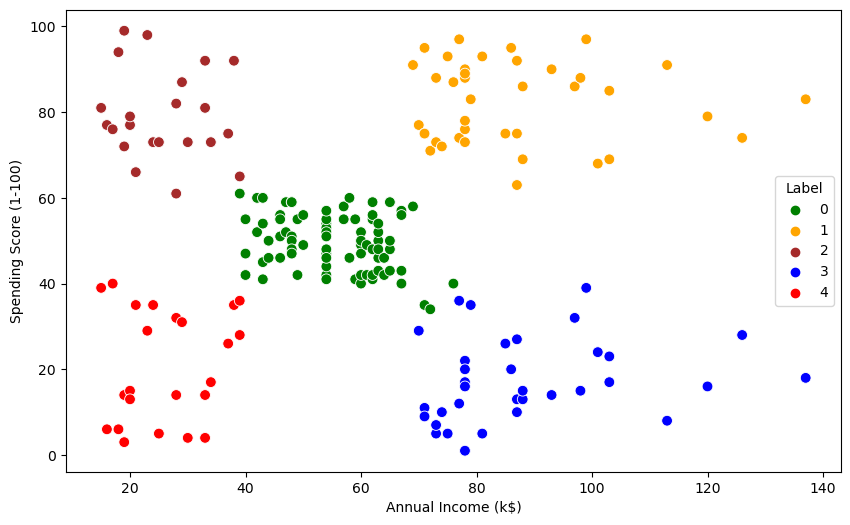

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", s=60, palette=['green','orange','brown','blue','red'])
plt.show()